# **SOTER: Quick ID & Background Checking for Credit Risk Analysis**

## I. Introduction

- Group 04
- Group Members: Ronaldo Syahputra, Titian F. Prasasti, Daniel Satria, Prabaningrum H.B., Radyatra Sidharta
- Batch: 001-HCK

**This notebook is part of the final project in the Data Science bootcamp at Hacktiv8.**

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Problem Description
    - c. Objective
    - d. Problem Statement

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)
    - a. Not-a-Number Handling
    - b. Duplication Handling
    - c. Class Balance Visualization

- V. Data Preprocessing
    - a. Feature Selection
    - b. Class Balancing
    - c. Splitting Dataset
    - d. Outlier Handling
    - e. Preprocessing Pipeline

- VI. Machine Learning Model
    - a. Random Forest
    - b. Decision Tree
    - c. AdaBoost
    - d. LightGBM
    - e. XGBoost  

- VII. Model Saving

- VIII. Model Inference

- IX. Conclusion & Recommendation

### b. Problem Description

According to the OJK Fintech Lending Statistic Report 2021 and 2022 Bank Indonesia Banking Report, there is an increasing trend regarding any form of loan/credit application. It takes four to 14 workdays to review each application to determine whether the applications are accepted or declined. Most industries are using manual rule-based review which makes the reviewing process turn more costly. With such trends of increasing loan/credit applications combined with a time-consuming and high-cost reviewing process, Project Soter offers an integrated system that will accelerate the efficiency of the application review process utilizing machine learning algorithm. Within this system, we will build two types of models. The first one is the ID verification model that calculates whether the face of the prospective debtor's photo is matched with the photo on their ID and the second one is the background checking model that predicts whether the prospective debtor's application is accepted or declined. This notebook will contain spesifically the background checking model.

### c. Objective

Create a Machine Learning model that can determine whether a prospective loanee is eligible or not to be given a loan, based on their financial background, historical transactions.

### d. Problem Statement

The deliberation of accepting or rejecting a loan is still relatively lengthy, less efficient and expensive when compared to the growth of credit distribution, which continues to increase. In order to catch up with the increase in loan applications, a better system is needed to replace and/or work in conjunction with the already available resources.

## II. Library Import

In [7]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# For Feature Scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# For Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

np.random.seed(42)
tf.random.set_seed(42)

## III. Data Loading

In [8]:
# Loading the csv file using pd.read.
df = pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


The dataset we have here is that gathered from a sources surrounding the Loaning industry in the United States of America. Although more intricate then what we can find here in Indonesia, the dataset still provides a unique insight on what is under deliberation when it comes to loaning, the advantages and disadvantages of the loaning process in the US compared to Indonesia, and what additions or improvements could be provided nationwide in the future.

As displayed in the table above, we understand that there are about 880 thousand data samples in our dataset, with a corresponding 74 columns representing variables that may or may not be important for our model. The information present includes the account information of the loanees, as well as their financial and transaction history, followed by their loan information.

Dataset Link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

## IV. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis is done in conjunction with the Excel file entitled "Feature Selection_Details" in the "Excel Files" folder as part of the elaborate and detailed dive into our dataset. There, each of our columns are examined for their attributes, focusing mostly on their type, Not-a-Number (NaN) count, description, and other corresponding information. This analysis will then contribute to the Feature Selection decision which we will undertake in the following chapters. 

Columns included in our dataset are that of our independent variables (henceforth called "Features") and dependent variable (henceforth called "Target"). To elaborate, according to the link in which we obtained our dataset, columns beside "loan_status" is considered to be the features in our data. In the EDA, the manipulation of the dataset will not be done, rather we will only be cleaning it. This cleaning process includes the removal of NaNs / Nulls, duplicates, among other things.

### a. Not-a-Number (NaN) Detection

Detecting and removing NaNs is a crucial first step to enable the working of our model. The reasoning behind this is because a Machine Learning model would only be able to train on numerical data. Hence, our model would not be able to process a NaN value. 

In [9]:
# Syntax for detecting the NaNs in our dataset.
df.isnull().sum().sort_values(ascending=False).head(45)

dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
il_util                        868762
mths_since_rcnt_il             866569
open_acc_6m                    866007
open_il_6m                     866007
open_il_12m                    866007
open_il_24m                    866007
total_bal_il                   866007
inq_last_12m                   866007
open_rv_12m                    866007
open_rv_24m                    866007
max_bal_bc                     866007
all_util                       866007
inq_fi                         866007
total_cu_tl                    866007
desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       51462
emp_length  

From the information above, we can understand that several features in our dataset, about 40 to be exact, have NaNs in them. However, working together with aforementioned Excel file containing details on our features, we can determine which of them to drop and which to retain. Nevertheless, for extra precaution, we would also be conducting another search for NaN values. In this case, we will be looking for specific NaN values that cannot be detected by the syntax above.

In [10]:
# Additional forms of anomalies that we need to detect in our dataset.
anomalous_entries = {}

for x in list(df.columns):
    anomalous_entries[x] = 0
    for y in df[x]:
        if y in ['NaN', 'N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be looking for.
            anomalous_entries[x] = anomalous_entries[x] + 1

anomalous_entries

{'id': 0,
 'member_id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'desc': 246,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 0,
 'last_credit_pull_d': 0,
 'collections_12_mths_ex_med': 0,
 'mths_since_last_major_dero

Here, we observe that only the feature "desc" have such anomalies mentioned above. However, looking closely, we can ascertain that this column is not a feature, but rather bears irrelevant information to our target. There are other columns in our dataset that serves as a label or as the same purpose as "desc". Therefore, we will be removing them later on during Feature Selection in the Data Processing process.

### b. Duplication Handling

Aside from finding NaNs in our dataset, it is equally important that we look for duplications as well. Removing duplicates in our data will decrease the noise, and hence, the margin of error of our model, improving performance.

In [11]:
# Detecting duplicates in our data.
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) 

0         False
591590    False
591579    False
591580    False
591581    False
          ...  
295796    False
295797    False
295798    False
295799    False
887378    False
Length: 887379, dtype: bool

From the information above, we could ascertain that there no duplicates in our data.

### c. Class Balance Visualization

As stated before, we would find that the column "loan_Status" is considered to be our target. However, if we look back to the objective of this notebook, we could understand that we are looking for a decision that is binary, which in our case is to accept or reject a loan. Unfortunately, our dataset has more than two classes to begin with, as seen below.

Class Balance:  Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


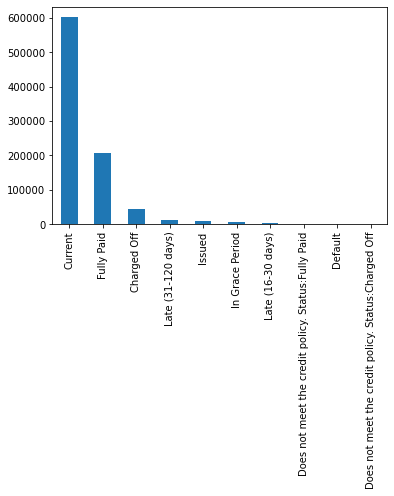

In [12]:
df['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df['loan_status'].value_counts())

Therefore, we would need to convert and combine these classes with one another, to have an output of only two. 

## V. Data Preprocessing

Data preprocessing is an important step in enabling our model to train on our data. Here, it is important that all our data samples / entries are converted into numerical values. However, such steps would differ according to the types of samples we have.

In [13]:
df.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

With a combination of integers, float, and object (string / non-numerical) types of variables in our dataset, we would be using processes such as Scaling (to standardize / normalize the numerical values) and Encoding (to convert categorical / non-numerical values to numbers). Nevertheless, a pivotal step before conducting both scaling and encoding would be to first conduct a Feature Selection and, of course, the splitting of our dataset, the flow of which is determined according to the needs of every project. In this case, we will be doing feature selection first before the splitting.

### a. Feature Selection

With about 800 thousand samples and 70 features, it our machine learning model would take a considerable amount of time and computer resource to train and test on our dataset. Therefore, the feature selection procedure is established to lessen such impacts, and works by using statistical processes to find the correlation of our features to our target in terms of magnitude.

However, it is important to remember that the selection of features alone should not depend solely on these statistics. Intuition and the facts we have regarding each features would also be a solid basis in such deliberations.

In [15]:
# Defining new dataframe and selecting the features without or with acceptable amounts of NaNs. 
df1 = df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length', 'revol_util', 'delinq_2yrs', 'inq_last_6mths',
'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'collection_recovery_fee', 'application_type', 'last_pymnt_amnt', 'recoveries', 'pymnt_plan',
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
'total_rec_late_fee', 'purpose', 'revol_bal', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'out_prncp_inv', 'loan_status']]

In [16]:
# Splitting dataframe into three categories: Numerical, Categorical (Nominal), and Categorical (Ordinal)
df_nominal = df1[['application_type', 'term', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']]
df_ordinal = df1[['emp_length', 'grade', 'sub_grade']]
df_num = df1[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'delinq_2yrs', 'inq_last_6mths',
'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'collection_recovery_fee', 'last_pymnt_amnt', 'recoveries', 'pymnt_plan',
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'out_prncp_inv', 'loan_status']]

This early dataframe splitting is done for the sole purpose of feature selection, where each sets will be encoded or scaled according to their types. The processed dataframes we obtain afterwards will not be used in the next processes / chapters. 

Clarification on why the dataframe is split into three categories:

- The nominal dataframe is used to One Hot Encode categorical data that are non-hierarchical (no levels) in nature.
- The ordinal dataframe is used to Ordinal Encode categorical data that are hierarchical in nature.
- The numerical dataframe is used to Scale numerical data.

To make sense of this, we provide the following tables to compare these three categories.

In [22]:
df_nominal.sample(5)

,application_type,term,home_ownership,verification_status,purpose,initial_list_status
342833,INDIVIDUAL,60 months,MORTGAGE,Verified,debt_consolidation,w
209428,INDIVIDUAL,36 months,RENT,Verified,wedding,f
268768,INDIVIDUAL,36 months,MORTGAGE,Not Verified,debt_consolidation,f
218911,INDIVIDUAL,36 months,OWN,Not Verified,home_improvement,f
517742,INDIVIDUAL,36 months,MORTGAGE,Source Verified,home_improvement,w


In [24]:
df_ordinal.sample(5)

,emp_length,grade,sub_grade
403467,8 years,B,B4
881989,6 years,E,E3
773332,2 years,D,D1
236111,8 years,F,F3
154979,3 years,B,B4


In [25]:
df_num.sample(5)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,revol_util,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,...,installment,total_rec_late_fee,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,out_prncp_inv,loan_status
99579,30.0,255157.0,7200.0,88.2,0.0,0.0,8.0,0.0,29.0,0.0,...,568.90,0.0,6347.0,14596.40,15927.800000,15893.21,8403.60,7524.20,14564.66,Current
660813,54.0,149731.0,24400.0,9.1,0.0,0.0,7.0,0.0,10.0,0.0,...,150.58,0.0,2217.0,4352.22,751.420000,751.42,647.78,103.64,4352.22,Current
192796,0.0,231265.0,37700.0,77.2,0.0,0.0,5.0,0.0,12.0,0.0,...,725.33,0.0,29103.0,0.00,25056.659043,25056.66,21800.00,3256.66,0.00,Fully Paid
402011,0.0,26321.0,22700.0,45.9,0.0,0.0,8.0,0.0,21.0,0.0,...,476.30,0.0,10428.0,7160.95,9526.000000,9526.00,7839.05,1686.95,7160.95,Current
56561,0.0,333103.0,41600.0,43.1,0.0,0.0,10.0,0.0,31.0,0.0,...,552.67,0.0,17919.0,0.00,18722.793078,18696.79,18000.00,722.79,0.00,Fully Paid


We will now move on to the feature selection. Here, we will be using K-Best Score to determine which features to retain and which to drop. 

In [26]:
# Converting Multiclass Target into Binary (Accepted Loan or Rejected Loan) for the purpose of Feature Selection.
df_num.replace({'Fully Paid' : 0, 'Charged Off' : 1, 'Current':0, 'Default':1,
       'Late (31-120 days)' : 1, 'In Grace Period':0, 'Late (16-30 days)':0,
       'Does not meet the credit policy. Status:Fully Paid': 0,
       'Does not meet the credit policy. Status:Charged Off': 1, 'Issued':0}, inplace=True)

In [27]:
# Defining the Scaler and Encoders to be used.
scaler = MinMaxScaler
ordinal_encoder = OrdinalEncoder()
nominal_encoder = OneHotEncoder()

In [31]:
# Encoding ordinal dataframe.
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal))
df_ordinal_encoded.head()

,0,1,2
0,1.0,1.0,6.0
1,10.0,2.0,13.0
2,1.0,2.0,14.0
3,1.0,2.0,10.0
4,0.0,1.0,9.0


The categorical features emp_length, grade, and sub_grade has now been converted as such above.

In [30]:
# Encoding nominal dataframe
df_nominal_encoded = pd.DataFrame(nominal_encoder.fit_transform(df_nominal).toarray())
df_nominal_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Below, we will be attempting to make sense of the nominally encoded features we have in the table above. Note that each unique values inside one feature has now become their own column. For example, the feature application type has been split into two new columns "0" and "1", with "0" representing INDIVIDUAL and "1" representing JOINT. The input in any of those columns represents False (0) and True (1).

In [32]:
df1['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [33]:
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
df1['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [35]:
df1['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [36]:
df1['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [37]:
df1['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [38]:
df_nominal_encoded.columns = ['columns_1', 'columns_2', 'columns_3', 'columns_4', 'columns_5', 'columns_6', 'columns_7', 'columns_8', 
'columns_9', 'columns_10', 'columns_11', 'columns_12', 'columns_13', 'columns_14', 'columns_15', 'columns_16', 'columns_17', 'columns_18', 'columns_19', 'columns_20', 'columns_21', 'columns_22', 'columns_23', 'columns_24', 'columns_25', 'columns_26', 'columns_27', 'columns_28', 'columns_29' ]

In [39]:
# Combining all the scaled and encoded features.
df_full = pd.concat([df_num,df_ordinal_encoded,df_nominal_encoded], axis=1)
df_full.dropna(inplace=True)
df_full.head().T

,42535,42536,42537,42538,42539
tot_coll_amt,0.0,0.0,0.0,15386.0,1514.0
tot_cur_bal,114834.0,14123.0,267646.0,13605.0,272492.0
total_rev_hi_lim,59900.0,15100.0,61100.0,8100.0,15400.0
revol_util,61.2,52.8,21.6,68.8,74.2
delinq_2yrs,0.0,0.0,0.0,0.0,0.0
inq_last_6mths,0.0,0.0,1.0,0.0,0.0
open_acc,14.0,12.0,12.0,7.0,8.0
pub_rec,0.0,0.0,0.0,2.0,0.0
total_acc,27.0,28.0,22.0,32.0,29.0
acc_now_delinq,0.0,0.0,0.0,0.0,0.0


In [40]:
# Converting the feature "pymnt_plan" into numerical.
df_full.replace({'n':0, 'y':1}, inplace=True)

In [41]:
# Finding the K-Best Score for each of our features.
K_best = SelectKBest(k=4)
train_K_best = K_best.fit(df_full.drop(columns='loan_status', axis=1), df_full['loan_status'])
K_best_scores = np.round_(train_K_best.scores_)

df_K_best_Scores = pd.Series(K_best_scores)
df_K_best_Scores.index = df_full.drop(columns='loan_status', axis=1).columns
df_K_best_Scores.sort_values(ascending=False)

recoveries                 180299.0
collection_recovery_fee     92777.0
out_prncp_inv               24541.0
out_prncp                   24541.0
int_rate                    24201.0
total_rec_late_fee          18510.0
2                           16574.0
1                           15769.0
last_pymnt_amnt              5621.0
total_rec_prncp              5363.0
columns_28                   4290.0
columns_29                   4290.0
inq_last_6mths               3915.0
total_rec_int                2884.0
columns_13                   1854.0
revol_util                   1433.0
tot_cur_bal                  1156.0
total_rev_hi_lim             1005.0
columns_10                    908.0
columns_3                     899.0
columns_4                     899.0
total_pymnt                   832.0
total_pymnt_inv               832.0
columns_15                    777.0
columns_6                     735.0
columns_11                    521.0
columns_25                    460.0
columns_12                  

To interpret the K-Best Scores above, we will set up our own threshold, with any number below it will contain features that we will drop. Note that the nominally encoded features has since been split into parts according to how many category they have in their respective columns. Therefore, the deliberation for them would be regarding how many of their categories are below the threshold and/or how closely related they are to our target (which means how large the K-Best Scores are and whether they fall above the threshold or not).

In [42]:
# Dropping the columns deemed to be below our threshold.
df1.drop(columns=['delinq_2yrs', 'acc_now_delinq', 'tot_coll_amt', 'pymnt_plan', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt', 'application_type'], axis=1, inplace=True)

In [43]:
# The features that are left after the dropping.
df1.head().T

,0,1,2,3,4
tot_cur_bal,NaN,NaN,NaN,NaN,NaN
total_rev_hi_lim,NaN,NaN,NaN,NaN,NaN
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
revol_util,83.7,9.4,98.5,21.0,53.9
inq_last_6mths,1.0,5.0,2.0,1.0,0.0
open_acc,3.0,3.0,2.0,10.0,15.0
pub_rec,0.0,0.0,0.0,0.0,0.0
total_acc,9.0,4.0,10.0,37.0,38.0
collection_recovery_fee,0.0,1.11,0.0,0.0,0.0
last_pymnt_amnt,171.62,119.66,649.91,357.48,67.79


In [44]:
# Copying of dataframe to preserve df1.
df2 = df1.copy()
df2.shape

(887379, 29)

In [46]:
# Displaying number of NaNs we have in the dataframe.
df2.isnull().sum()

tot_cur_bal                70276
total_rev_hi_lim           70276
emp_length                 44825
revol_util                   502
inq_last_6mths                29
open_acc                      29
pub_rec                       29
total_acc                     29
collection_recovery_fee        0
last_pymnt_amnt                0
recoveries                     0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
home_ownership                 0
verification_status            0
total_rec_late_fee             0
purpose                        0
revol_bal                      0
initial_list_status            0
out_prncp                      0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
out_prncp_inv                  0
loan_status                    0
dtype: int64

In [48]:
# Converting Multiclass Target into Binary (Accepted Loan or Rejected Loan) for the next steps of preprocessing.
df2['loan_status'].replace({'Fully Paid' : 0, 'Charged Off' : 1, 'Current':0, 'Default':1,
       'Late (31-120 days)' : 1, 'In Grace Period':0, 'Late (16-30 days)':0,
       'Does not meet the credit policy. Status:Fully Paid': 0,
       'Does not meet the credit policy. Status:Charged Off': 1, 'Issued':0}, inplace=True)

In [50]:
# Dropping NaNs in our dataframe.
df2.dropna(inplace=True)

In [51]:
# Rechecking amount of NaNs in our dataframe.
df2.isnull().sum()

tot_cur_bal                0
total_rev_hi_lim           0
emp_length                 0
revol_util                 0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
collection_recovery_fee    0
last_pymnt_amnt            0
recoveries                 0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
total_rec_late_fee         0
purpose                    0
revol_bal                  0
initial_list_status        0
out_prncp                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
out_prncp_inv              0
loan_status                0
dtype: int64

In [54]:
df2.shape

(773968, 29)

Class Balance:  0    728983
1     44985
Name: loan_status, dtype: int64


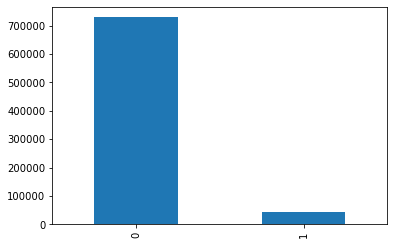

In [53]:
df2['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df2['loan_status'].value_counts())

Following our feature selection, we have now reduced the number of features from 73 to 28, with all NaNs removed, and with a Class Balance as above.

### b. Class Balancing

To ensure increased accuracy and performance of our model, class balancing is recommended. Again, as seen above, we have a Class 0 count of 728 thousand and a Class 1 count of only 44 thousand. This means that Class 1 only represents a exceedingly low 5.8% of the entirety of the dataset.

In [55]:
(44985/(728983+44985))*100

5.812255803857524

To interpret this number, we refer to the information below: 

- Ratio of 20 - 40% = Mild Imbalance 

- Ratio of 1 - 20% = Moderate Imbalance

- Ratio of Below 1% = Extreme Imbalance

As such, we have a moderate imbalance in our target class. Standard practice suggests that a moderate and extreme imbalance would need to be corrected.

Reference: https://bit.ly/3E2twQd

We will be using undersampling to handle our imbalance in an effort to preserve our real data samples, as opposed to synthesizing / creating new data entries of our own that are similar to that of our original dataset. The undersampling will be done to the Majority Class (0 / Accepted Loan), dropping its sample size relatively close to that of our Minority Class (1 / Rejected Loan).

*Note that only our train sets will be balanced as we aim to keep the test set as close as possible to the original dataset to accurately evaluate the performance of our models.

In [56]:
# Splitting our dataframe into train and test sets for the undersampling process.
df_train, df_test = train_test_split(df2, train_size=0.8, stratify=df2['loan_status'], random_state=42)

In [57]:
# Checking the balance of our Train and Test sets.
df_train['loan_status'].value_counts()

0    583186
1     35988
Name: loan_status, dtype: int64

In [58]:
df_test['loan_status'].value_counts()

0    145797
1      8997
Name: loan_status, dtype: int64

Class Balance:  0    50000
1    35988
Name: loan_status, dtype: int64


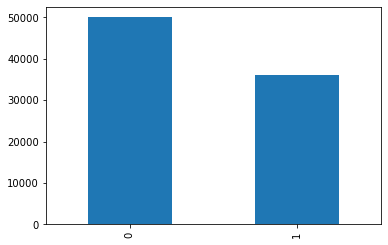

In [60]:
# Undersampling our majority target class to 50000.
train_0 = df_train[df_train['loan_status']==0].sample(50000, replace=True)
train_1 = df_train[df_train['loan_status']==1]

df3 = pd.concat([train_0, train_1])
df3 = df3.sample(len(df3))

df3['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df3['loan_status'].value_counts())

We could now observe that our majority class has been reduced to 50000 for the train set, with our minority class standing close by at 35988.

In [61]:
(35988/(50000+35988))*100

41.85235149090571

Our minority class is now about 41% of the entirety of our dataset, which is considered balanced.

### c. Splitting Dataset

The splitting of the dataset is done as a necessary step to ensure that our model will be learning from the trenda and patterns of our train set, where it will later on make predictions using our test set. These results will then be compared to evaluate the performance of the model, and to determine whether or not further improvements may be necessary. It is imperative that this step is done as early as possible to prevent data leakage. Data leakage happens when our model has inadvertently "took a peak" at the pattern of our test data before it is inputted into it. Hence, if this were to happen, then our model would falsely be accurate in its predictions, which would diminish its performance and accuracy when it comes to being deployed and inputted with live data.

In addition to splitting between a train and test set, our data would also be seperated between its features and the target. This is done solely due to it being a requirement as an input into our model. Without doing so, our model would not function.

In [62]:
# Spliting dataset to train and test sets, with X as the dataframe for our features and Y for our target.
X_train = df3.drop(['loan_status'], axis=1)
X_test = df_test.drop(['loan_status'], axis=1)

y_train = df3[['loan_status']]
y_test = df_test[['loan_status']]

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (85988, 28)
X_Test Size  :  (154794, 28)
y_Train Size :  (85988, 1)
y_Test Size  :  (154794, 1)


### d. Outlier Handling

Outlier handling is another process that can reduce the error of margin of our model, increasing its performance. This handling is done only to the Numerical data in our Train set.

In [63]:
# Splitting of our train set into numerical and two categorical dataframes.
X_train_num = X_train.drop(['emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'], axis=1)
X_train_ordinal = X_train[['emp_length', 'verification_status', 'grade', 'sub_grade']]
X_train_nominal = X_train[['home_ownership', 'purpose', 'initial_list_status']]

In [67]:
# Converting the feature "term" into numerical from categorical.
X_train_num.replace({' 36 months':36, ' 60 months':60}, inplace=True)

In [75]:
# Syntax to create histogram and boxplot.
def diagnostic_plots(X_train_num, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train_num[variable])
    plt.title('Boxplot')

    plt.show()

    # Skewness
    print('\nSkewness Value : ', X_train_num[variable].skew())

    # Kurtosis
    print('\nKurtosis Value : ', X_train_num[variable].kurtosis())

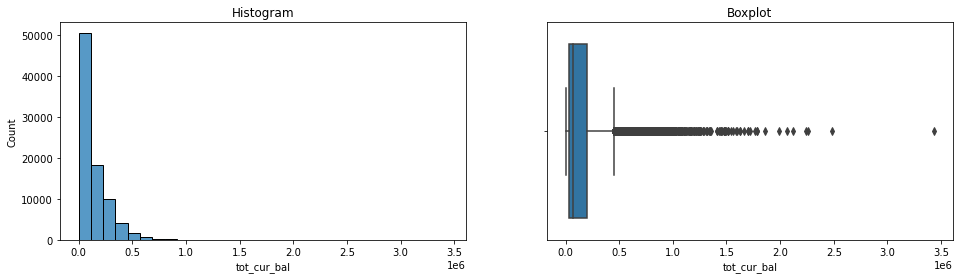


Skewness Value :  2.4936943178325084

Kurtosis Value :  14.58587564027058


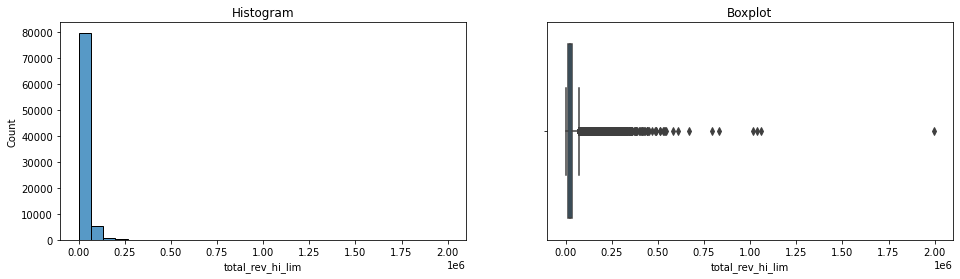


Skewness Value :  8.821274531445349

Kurtosis Value :  304.67923297303315


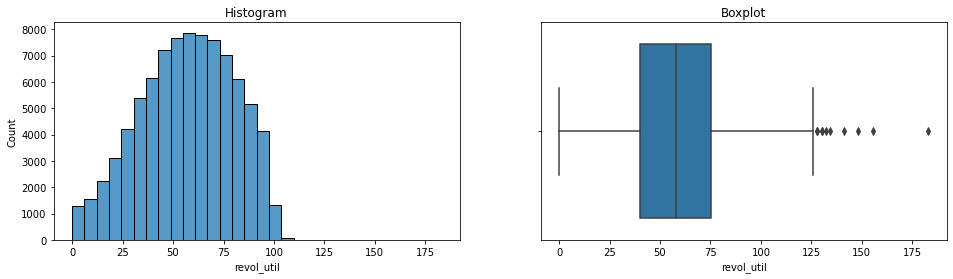


Skewness Value :  -0.2238919214224984

Kurtosis Value :  -0.648246776285117


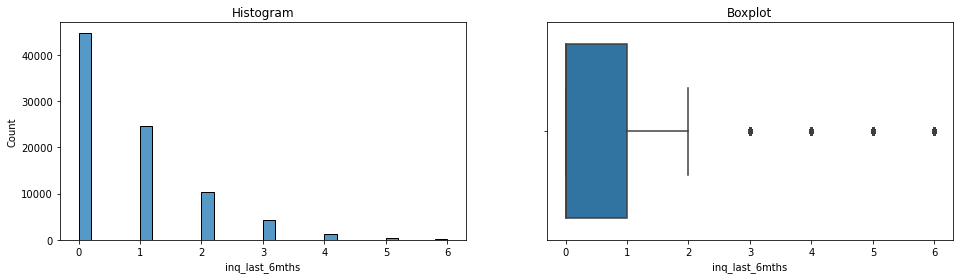


Skewness Value :  1.5585788766121673

Kurtosis Value :  2.676420327801664


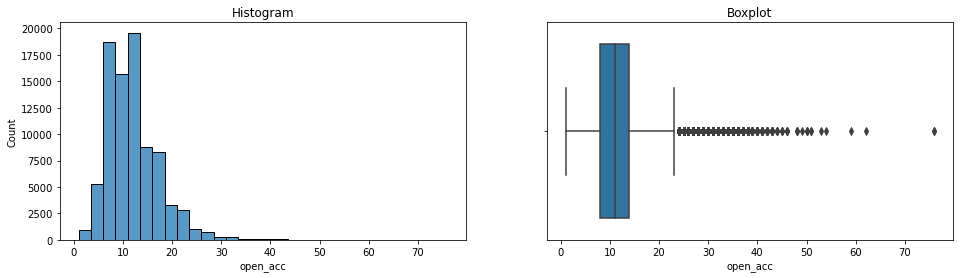


Skewness Value :  1.2753093558973616

Kurtosis Value :  3.374651439181022


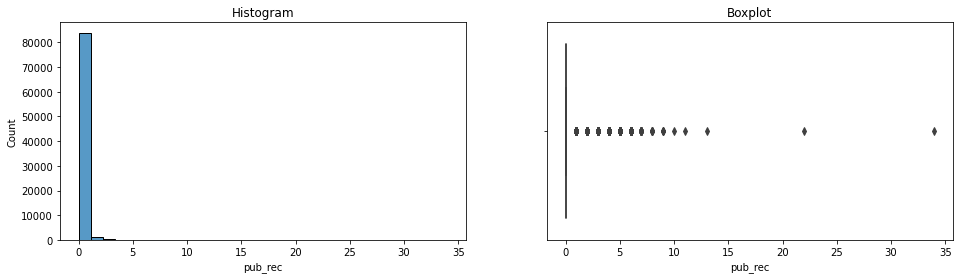


Skewness Value :  7.689679541881874

Kurtosis Value :  227.5630717390294


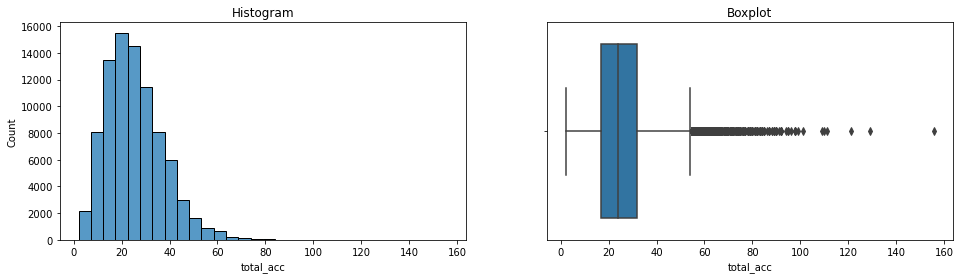


Skewness Value :  0.9136703956948359

Kurtosis Value :  1.4682750169973153


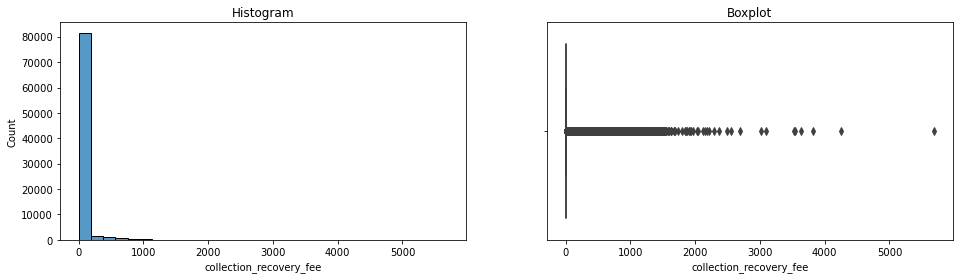


Skewness Value :  7.557162297116489

Kurtosis Value :  105.59804250190518


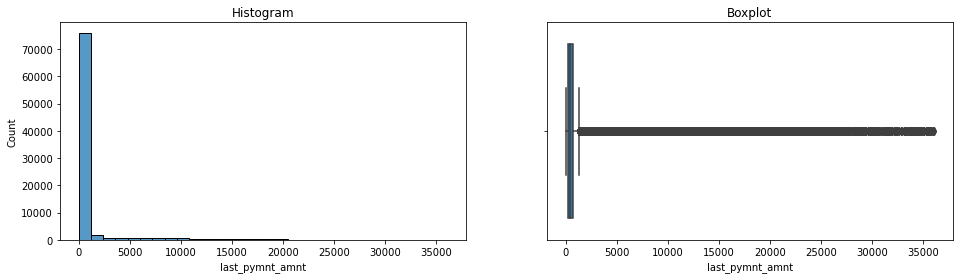


Skewness Value :  4.635172906979873

Kurtosis Value :  24.362723786567116


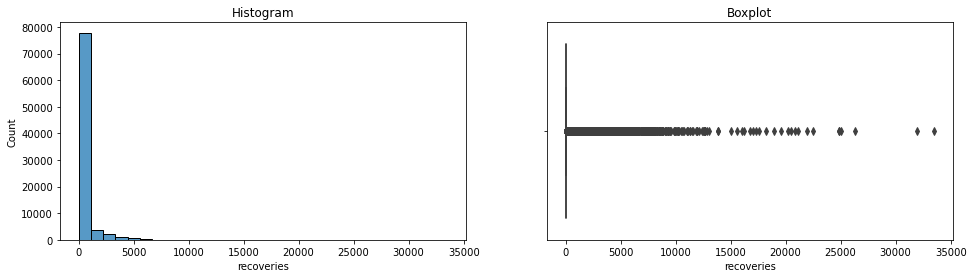


Skewness Value :  6.517136842518509

Kurtosis Value :  91.29405144198051


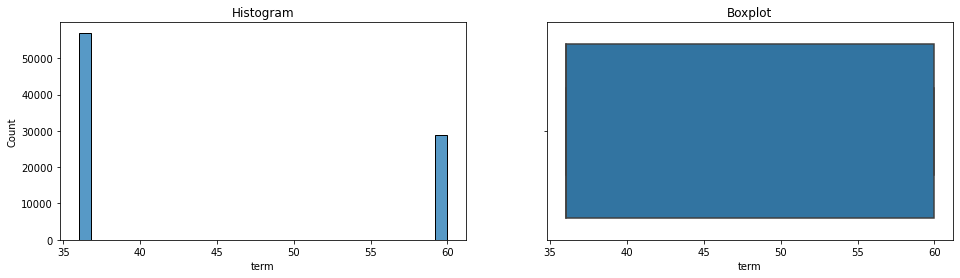


Skewness Value :  0.6907331988326608

Kurtosis Value :  -1.5229230703295598


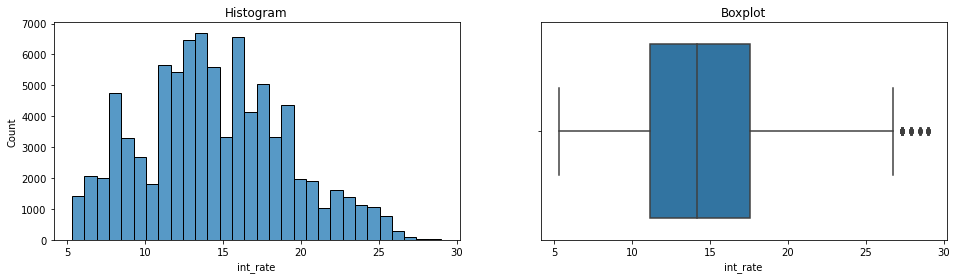


Skewness Value :  0.2742189238295607

Kurtosis Value :  -0.37850881411806414


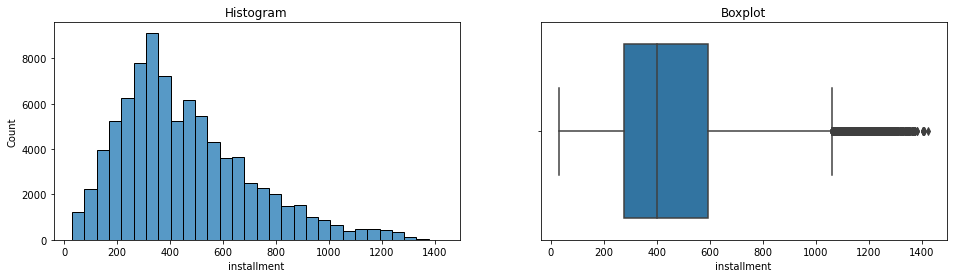


Skewness Value :  0.9209011312462243

Kurtosis Value :  0.6548588507252018


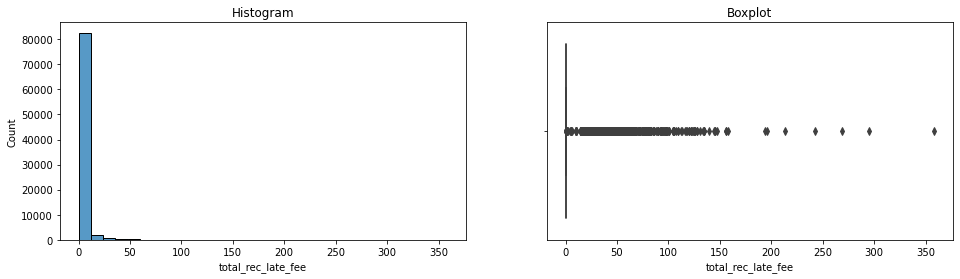


Skewness Value :  11.067063973028256

Kurtosis Value :  231.9364757009456


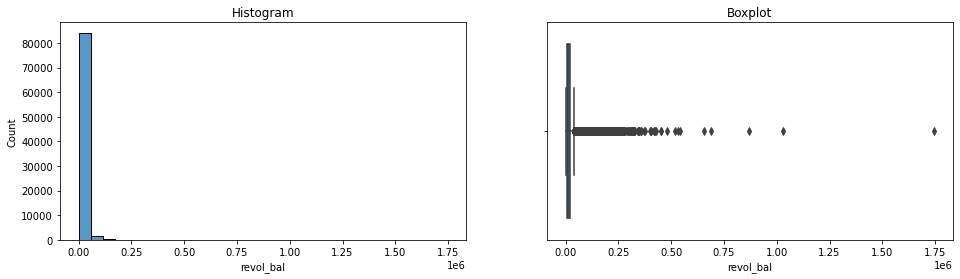


Skewness Value :  15.196255259401514

Kurtosis Value :  757.6697940838247


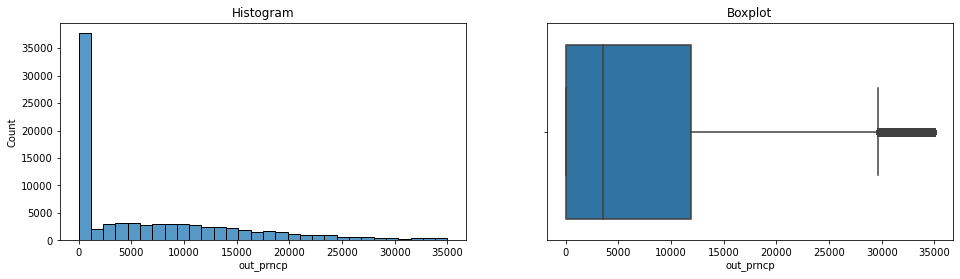


Skewness Value :  1.1614109252710907

Kurtosis Value :  0.5451708177143835


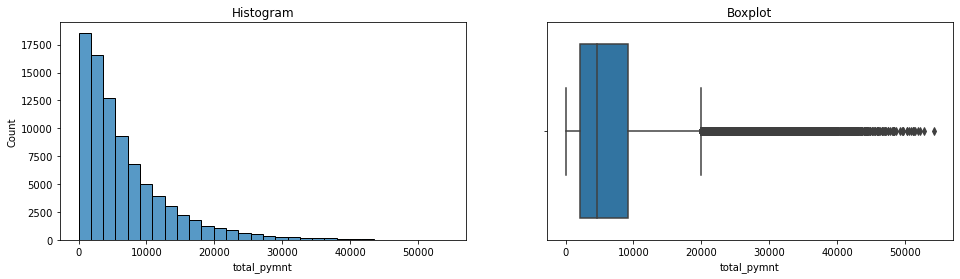


Skewness Value :  1.9667028085922214

Kurtosis Value :  4.952356516353943


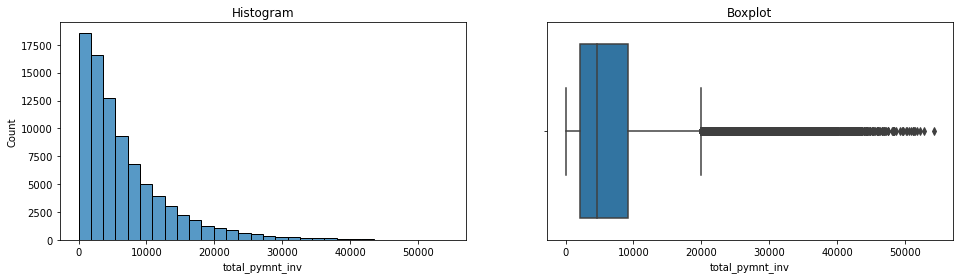


Skewness Value :  1.9667585416853752

Kurtosis Value :  4.953507950906758


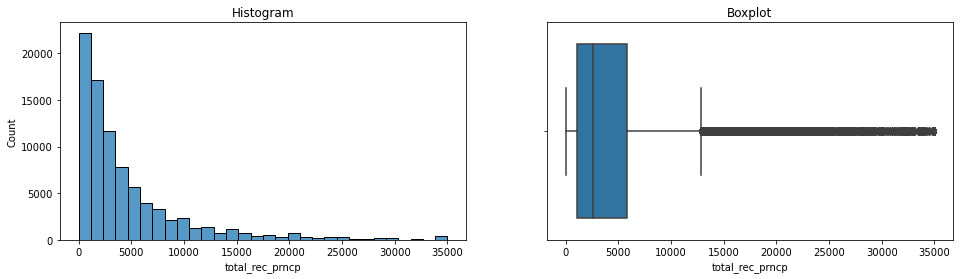


Skewness Value :  2.4663893290627454

Kurtosis Value :  7.3578973444450355


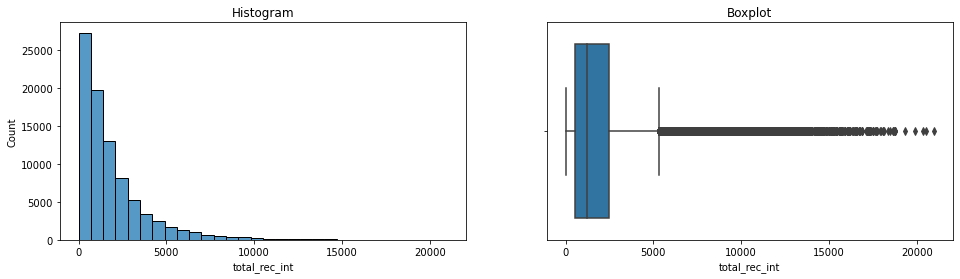


Skewness Value :  2.5087641945684713

Kurtosis Value :  8.908247816018626


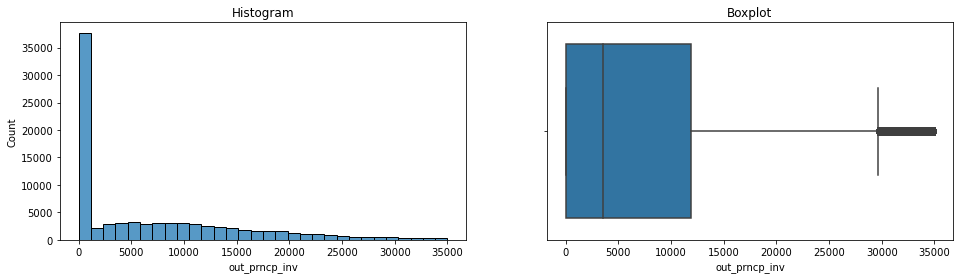


Skewness Value :  1.1612430087668721

Kurtosis Value :  0.5443135984286274


In [76]:
# For loop to create visualization for the numerical features.
for variable in X_train_num.columns:
    diagnostic_plots(X_train_num,variable)

Interpretation of Skewness:
- 0 to 0.5 or 0 to -0.5 = Normally Distributed
- 0.5 to 1 or -0.5 to -1 = Moderately Skewed
- Beyond 1 or -1 = Highly Skewed

From the graphs above, we could ascertain that several of our numerical features have outliers and are highly skewed. However, most of these outlier heavy and skewed features also have a large kurtosis, which means their data are distributed mostly in one area. Therefore, removing or censoring the outliers would make little sense, seeing how it would significantly reduce the range of our data, completely changing its trend. As such, we have decided not to handle any outliers.

*Note that not handling outliers is also considered acceptable in this case since the models we will be using (all Tree-Based) are not sensitive to outliers.

### e. Preprocessing Pipeline

A pipeline is used to shorten / expedite certain process that may otherwise need manual and/or sequential processing. For example, if we were to do scaling and encoding in a non-pipelined process, we would need to split the dataframe into numerical and categorical sets (as we have done before and will be doing again to make the pipeline) and process them individually. With the addition of a pipeline, we can rapidly input a whole dataframe into it where it will then automatically split the data, scale and/or encode it, before putting it all back together afterwards.

In [70]:
# Recombining Numerical and Categorical features for fitting of Pipeline.
X_train_pipe_final = pd.concat([X_train_num.reset_index(drop=True),X_train_ordinal.reset_index(drop=True),X_train_nominal.reset_index(drop=True)], axis=1)

# Redefining Scaler and Encoders.
scaler = MinMaxScaler()
onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

# Redefining Numerical and the two different Categorical columns.
num_col = X_train_num.columns.values
nominal_cat_col = X_train_nominal.columns.values
ordinal_col = X_train_ordinal.columns.values

# Creating individual Scaling and Encoding processes inside the Pipeline.
nominal_pipe = Pipeline([
    ('nominal_encode',OneHotEncoder())])

num_pipe = Pipeline([
    ('scaling',MinMaxScaler())])

ordinal_pipe = Pipeline([('ordinal_encode',OrdinalEncoder())])

# Combining the processes into the final Pipeline.
preprocess = ColumnTransformer([
    ('nom',nominal_pipe,nominal_cat_col),
    ('num',num_pipe,num_col),
    ('ordinal',ordinal_pipe,ordinal_col)])
    
# Placing the Pipeline into a new definition.
pipe = Pipeline(steps=[("preprocess", preprocess)])

# Training / Fitting the combined Numerical and Categorical dataframe with the Pipeline.
pipe.fit(X_train_pipe_final)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('nominal_encode',
                                                                   OneHotEncoder())]),
                                                  array(['home_ownership', 'purpose', 'initial_list_status'], dtype=object)),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'total_acc', '...
       'last_pymnt_amnt', 'recoveries', 'term', 'int_rate', 'installment',
       'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'out_prncp_inv'], dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  array(['emp_length', 'verification_status', 'grade', 'sub_grade'],
      dtype=object))]))])

In [71]:
# Obtaining the final Train dataframe after being Scaled and Encoded in the Pipeline.
transform_X_train = pipe.transform(X_train_pipe_final)
X_train_final = pd.DataFrame(transform_X_train)
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.543215,0.023551,0.023551,0.028213,0.013903,0.543215,1.0,0.0,1.0,5.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.150333,0.017547,0.017547,0.021096,0.010235,0.150333,3.0,0.0,1.0,6.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.481783,0.036033,0.036033,0.032503,0.039041,0.481783,1.0,0.0,1.0,9.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.204287,0.030963,0.030963,0.034284,0.022961,0.204287,1.0,0.0,1.0,9.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.714723,0.194698,0.194698,0.170991,0.218672,0.714723,7.0,2.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.395956,0.006411,0.006411,0.004044,0.009844,0.395956,1.0,1.0,4.0,22.0
85984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.054953,0.054953,0.071429,0.023117,0.000000,7.0,0.0,3.0,15.0
85985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.383872,0.070269,0.070269,0.073271,0.057121,0.383872,7.0,1.0,2.0,10.0
85986,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.159256,0.159256,0.053088,0.168682,0.000000,1.0,2.0,4.0,23.0


In [72]:
# Splitting the Test set in the same manner as the Train set and Training / Fitting it to the created Pipeline.
X_test_num = X_test.drop(['emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'], axis=1)
X_test_ordinal = X_test[['emp_length', 'verification_status', 'grade', 'sub_grade']]
X_test_nominal = X_test[['home_ownership', 'purpose', 'initial_list_status']]

X_test_num.replace({' 36 months':36, ' 60 months':60}, inplace=True)

X_test_pipe_final = pd.concat([X_test_num.reset_index(drop=True),X_test_ordinal.reset_index(drop=True),X_test_nominal.reset_index(drop=True)], axis=1)

transform_X_test = pipe.transform(X_test_pipe_final)
X_test_final = pd.DataFrame(transform_X_test)
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.619429,0.027489,0.027489,0.023428,0.032063,0.619429,1.0,0.0,2.0,11.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.273945,0.018980,0.018980,0.011769,0.029482,0.273945,1.0,2.0,4.0,22.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.237762,0.083189,0.083189,0.105095,0.040053,0.237762,1.0,1.0,0.0,4.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.132476,0.132476,0.099759,0.095623,0.000000,7.0,0.0,3.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.222114,0.100171,0.100171,0.120743,0.057902,0.222114,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154789,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.659722,0.042812,0.042812,0.054564,0.019817,0.659722,2.0,1.0,0.0,1.0
154790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.980720,0.033347,0.033347,0.019280,0.054128,0.980720,1.0,1.0,4.0,24.0
154791,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.756229,0.077330,0.077330,0.032343,0.146124,0.756229,5.0,2.0,6.0,32.0
154792,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.199478,0.199478,0.285714,0.039873,0.000000,1.0,1.0,1.0,8.0


Our data is now ready to be processed by the model.s

## VI. Machine Learning Model

In this notebook we will be using five different tree-based models and using the best as a deployment model. Note that the processes done below have been conducted several times outside of this notebook, and that the hyperparameters used are found to be the best so far.

### A. Random Forest

#### 1. Model Definition

In [ ]:
# Grid-Search Cross Validation

# Parameters to be tested.
param_grid_rnd = {'criterion' : ['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'max_features' : ['auto', 'sqrt', 'log2'], 'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}

# Defining Model to be used.
rnd_gridcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rnd, n_jobs=-1)

# Training Grid-Search CV.
rnd_gridcv.fit(X_train_final, y_train)

# Printing best hyperparameters.
print(rnd_gridcv.best_params_)

# This syntax has been run outside of this notebook. Therefore, we will proceed straight to the Model Definition below.

In [249]:
# Defining Random Forest model (with best hyperparameters).
model_random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators=100, max_depth = 10, max_features = 'sqrt', min_samples_leaf=1, random_state=42)

#### 2. Model Training

In [250]:
# Training Random Forest model.
model_random_forest.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

#### 3. Model Evaluation

In [278]:
# Obtaining the probability of where our predicted outcome will land on (Accepted Loan or Rejected Loan) using predict_proba.
y_train_random_forest_proba = model_random_forest.predict_proba(X_train_final)
y_test_random_forest_proba = model_random_forest.predict_proba(X_test_final)

There are two output for each data entry in predict_proba, one for probability that outcome will be 0 (Accepted Loan), and the other probability it will be 1 (Rejected Loan). Both outputs are in percentages.

Reference: https://bit.ly/3SjoVgG

In [279]:
# Obtaining the probability of where our predicted outcome will land on (Accepted Loan or Rejected Loan) using predict.
y_pred_train_random_forest = model_random_forest.predict(X_train_final)
y_pred_test_random_forest = model_random_forest.predict(X_test_final)

Similar to predict_proba, the syntax above is used to find the outcome of our prediction for each data entry (output will be either 0 or 1).

Reference: https://bit.ly/3S0osjF

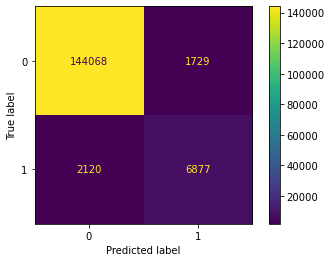

In [280]:
# Creation of the Confusion Matrix
cm_rnd = confusion_matrix(y_test, y_pred_test_random_forest, labels=model_random_forest.classes_)
disp_rnd = ConfusionMatrixDisplay(confusion_matrix=cm_rnd,display_labels=model_random_forest.classes_)

disp_rnd.plot()
plt.show()

A confusion matrix summarizes the prediction results on our classification problem. The numver of correct and incorrect predictions are summarized with count values and broken down to each class.

Here, we can conclude that the Random Forest model has a predicting outcome of 144068 True Positive (0 / Accepted Loan), 6877 True Negatives (1 / Rejected Loan), and a False Positive and False Negative of 2120 and 1729 respectively.

In [281]:
print(classification_report(y_train,y_pred_train_random_forest))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_random_forest_proba[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     50000
           1       0.99      0.77      0.86     35988

    accuracy                           0.90     85988
   macro avg       0.92      0.88      0.89     85988
weighted avg       0.91      0.90      0.90     85988

Train ROC-AUC Score:  0.9499619111926197


The Classification Report contains many useful information that is crucial to the evaluation of the model. As such, with numerous attributes at play, we may find ourselves wondering which aspects to use in our evaluation. With this, we would need to look at the particular context of our problem. As stated in the beginning of this notebook, we could understand that the purpose of creating our model is to determine whether a prospective loanee is eligible or not to be given a loan, based on their financial background, historical transactions, and facial ID recognition. As such, we are looking for our model to avoid the following two problems:

- Predicting that a loanee is risky when he/she is legitimate; or rejecting a loan when in fact we should accept it.
- Predicting that a loanee is legitimate when he/she is risky; or accepting a loan when in fact we should reject it.

For this, we will be looking at the attribute "Recall."

Recall Interpretation:

- The closer the Recall is to 1, the lesser the False Negative is.

There are two versions of Recall, and we will be noting this in accordance to our case:

- Recall Class 0 = False Negative is REJECTING a loan when in fact we should be ACCEPTING it.

- Recall Class 1 = False Negative is ACCEPTING a loan when in fact we should be REJECTING it.

It is important to note that we will only be looking at our Test Set for the evaluation.

*Additional Notes:

- Support describes the number of entries in each class.
- The Accuracy is defined as a ratio of correctly predicted observation to the total observations. It is used only when there is a balance between classes in our dataset. Since our Test Set is imbalanced, we will not be using accuracy.
- The ROC-AUC Score in our case would only be used to ascertain the fit of our model.

In [282]:
print(classification_report(y_test,y_pred_test_random_forest))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_random_forest_proba[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    145797
           1       0.80      0.76      0.78      8997

    accuracy                           0.98    154794
   macro avg       0.89      0.88      0.88    154794
weighted avg       0.97      0.98      0.97    154794

Test ROC-AUC Score:  0.941726123408151


Random Forest Model Test Set Overview:

- Class 0 Recall is 0.99 / 99%
- Class 1 Recall is 0.76 / 76%

Summary:

Class 0's recall score indicates to us that the model is 99% accurate at classifying loanees as legitimate. This means that there is minimal-to-no consequence of upsetting customer satisfaction by accidentally rejecting their loans.

For Class 1, we have a decent recall at 76%, which would indicate that our model is good at accurately classifying loanees as risky. However, this still means that there is a 24% chance of accidentally accepting loans for risky loanees.

ROC-AUC score of 95% for Train Set and 94% for Test Set. Assuming that range of 5% determines if model is fit, then we can conclude that this model is just-fit.

### b. Decision Tree

#### 1. Model Definition

In [442]:
# Grid-Search Cross Validation
param_grid_tree = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'max_features' : ['auto', 'sqrt', 'log2'], 'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}

# Defining Model to be used.
tree_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, n_jobs=-1)

# Training dataset.
tree_gridcv.fit(X_train_final, y_train)

# Printing best hyperparameters.
print(tree_gridcv.best_params_)

# Again, this syntax has been run outside of this notebook. Therefore, we will proceed straight to the Model Definition below.

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]})

In [131]:
# Defining Decision Tree model (with best hyperparameters).
tree_clf = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 10, max_features = 'auto', min_samples_leaf=6, random_state=42)

#### 2. Model Training

In [132]:
tree_clf.fit(X_train_final, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='auto',
                       min_samples_leaf=6, random_state=42)

#### 3. Model Evaluation

In [133]:
y_train_tree_prob = tree_clf.predict_proba(X_train_final)
y_test_tree_prob = tree_clf.predict_proba(X_test_final)

In [134]:
y_pred_train_tree = tree_clf.predict(X_train_final)
y_pred_test_tree = tree_clf.predict(X_test_final)

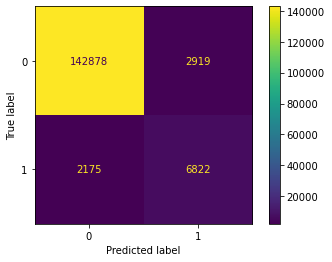

In [135]:
cm_tree = confusion_matrix(y_test, y_pred_test_tree, labels=tree_clf.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=tree_clf.classes_)

disp_tree.plot()
plt.show()

Here, we can ascertain that the Decision Tree model has a predicting outcome of 142878 True Positives (0 / Accepted Loan), 6822 True Negatives (1 / Rejected Loan), and a False Positive and False Negative of 2175 and 2919 respectively.

In [136]:
print(classification_report(y_train,y_pred_train_tree))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     50000
           1       0.97      0.76      0.85     35988

    accuracy                           0.89     85988
   macro avg       0.91      0.87      0.88     85988
weighted avg       0.90      0.89      0.89     85988

Train ROC-AUC Score:  0.9388825430699121


In [137]:
print(classification_report(y_test,y_pred_test_tree))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.70      0.76      0.73      8997

    accuracy                           0.97    154794
   macro avg       0.84      0.87      0.86    154794
weighted avg       0.97      0.97      0.97    154794

Test ROC-AUC Score:  0.9343811844327236


Decision Tree Model Test Set Overview:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.76 / 76%

Summary:

Class 0's recall score indicates to us that the model is 98% accurate at classifying loanees as legitimate. This means that there is minimal chance of upsetting customer satisfaction by accidentally rejecting their loans.

For Class 1, we have a the same recall as the Random Forest model, at 76%, which would indicate that our model is also good at accurately classifying loanees as risky. However, this still means that there is a 24% chance of accidentally accepting loans for risky loanees.

ROC-AUC score for Train Set and Test Set is both 93%. Assuming that range of 5% determines if model is fit, then we can conclude that this model is just-fit.

### c. AdaBoost

#### 1. Model Definition

In [79]:
# Defining Random Forest model (with best hyperparameters).
model_ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=0.5, random_state=42)


#### 2. Model Training

In [80]:
model_ada_boost.fit(X_train_final, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

#### 3. Model Evaluation

In [81]:
y_train_predict_ada_boost = model_ada_boost.predict(X_train_final)
y_test_predict_ada_boost = model_ada_boost.predict(X_test_final)

In [82]:
y_train_predict_proba_ada_boost = model_ada_boost.predict_proba(X_train_final)
y_test_predict_proba_ada_boost = model_ada_boost.predict_proba(X_test_final)

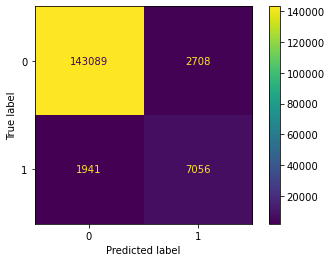

In [85]:
cm_ada = confusion_matrix(y_test, y_test_predict_ada_boost, labels=model_ada_boost.classes_)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada,display_labels=model_ada_boost.classes_)

disp_ada.plot()
plt.show()

Here, we can ascertain that the AdaBoost model has a predicting outcome of 143089 True Positive (0 / Accepted Loan), 7056 True Positives (1 / Rejected Loan), and a False Positive and False Negative of 1941 and 2708 respectively.

In [83]:
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_ada_boost))
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_ada_boost[:, 1]))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     50000
           1       0.98      0.80      0.88     35988

    accuracy                           0.91     85988
   macro avg       0.93      0.89      0.90     85988
weighted avg       0.92      0.91      0.91     85988

ROC AUC score train :  0.9696729623763476


In [84]:
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_predict_ada_boost))
print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_ada_boost[:, 1]))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.72      0.78      0.75      8997

    accuracy                           0.97    154794
   macro avg       0.85      0.88      0.87    154794
weighted avg       0.97      0.97      0.97    154794

ROC AUC score test :  0.9493968948128174


AdaBoost Model Test Set Overview:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.78 / 78%

Summary:

Class 0's recall score indicates to us that the model is 98% accurate at classifying loanees as legitimate. This means that there is little consequence of upsetting customer satisfaction by accidentally rejecting their loans.

For Class 1, we have a good recall at 80%, which would indicate that our model is great at accurately classifying loanees as risky. However, there is still a 20% chance of accidentally accepting loans for risky loanees.

ROC-AUC score of 97% for Train Set and 95% for Test Set. Assuming that range of 5% determines if model is fit, then we can conclude that this model is just-fit.

### d. LightGBM

#### 1. Model Definition

In [ ]:
# Grid-Search Cross Validation

# Parameters to be tested.
param_grid_lgbm = {'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.9, 1],
'num_leaves': [4, 14, 34, 64, 100], 'lambda_l1' : [2, 12, 42, 62, 100], 'max_bin' : [4, 14, 34, 64, 100], 'n_estimators': [200, 300, 500]}

# Defining Model to be used.
lgbm_gridcv = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_lgbm, n_jobs=-1)

# Training dataset.
lgbm_gridcv.fit(X_train_final, y_train)

# Printing best hyperparameters.
print(lgbm_gridcv.best_estimator_)

# This syntax has been run outside of this notebook. Therefore, we will proceed straight to the Model Definition below.

In [368]:
# Defining LightGBM model (with best hyperparameters).
lgbm = LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, n_estimators=300, num_leaves= 50, random_state=42)

#### 2. Model Training

In [369]:
lgbm.fit(X_train_final, y_train)

LGBMClassifier(n_estimators=300, num_leaves=50, random_state=42)

#### 3. Model Evaluation

In [370]:
y_train_lgbm_prob = lgbm.predict_proba(X_train_final)
y_test_lgbm_prob = lgbm.predict_proba(X_test_final)

In [371]:
y_pred_train_lgbm = lgbm.predict(X_train_final)
y_pred_test_lgbm = lgbm.predict(X_test_final)

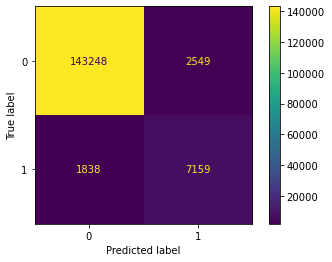

In [372]:
cm_lgbm = confusion_matrix(y_test, y_pred_test_lgbm, labels=lgbm.classes_)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm,display_labels=lgbm.classes_)

disp_lgbm.plot()
plt.show()

We can understand that the LightGBM model has a predicting outcome of 143248 True Positives (0 / Accepted Loan), 7159 True Negatives (1 / Rejected Loan), and a False Positive and False Negative of 1838 and 2549 respectively.

In [373]:
print(classification_report(y_train,y_pred_train_lgbm))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_lgbm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     50000
           1       1.00      0.86      0.92     35988

    accuracy                           0.94     85988
   macro avg       0.95      0.93      0.94     85988
weighted avg       0.94      0.94      0.94     85988

Train ROC-AUC Score:  0.9916060097810381


In [375]:
print(classification_report(y_test,y_pred_test_lgbm))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_lgbm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.74      0.80      0.77      8997

    accuracy                           0.97    154794
   macro avg       0.86      0.89      0.88    154794
weighted avg       0.97      0.97      0.97    154794

Test ROC-AUC Score:  0.9558180973342776


LightGBM Model Test Set Overview:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.80 / 80%

Summary:

Class 0's recall score indicates to us that the model is 99% accurate at classifying loanees as legitimate. This means that there is minimal-to-no consequence of upsetting customer satisfaction by accidentally rejecting their loans.

For Class 1, we have a good recall at 78%, which would indicate that our model is better at accurately classifying loanees as risky. However, there is still a 22% chance of accidentally accepting loans for risky loanees.

ROC-AUC score of 97% for Train Set and 95% for Test Set. Assuming that range of 5% determines if model is fit, then we can conclude that this model is just-fit.

### e. XGBoost

#### 1. Model Definition

In [77]:
model_xgboost = XGBClassifier(eta=0.9, subsample=0.5, max_depth=7, n_estimators=200, random_state=42)

[10:53:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### 2. Model Training

In [ ]:
model_xgboost.fit(X_train_final, y_train)

#### 3. Model Evaluation

In [ ]:
y_train_predict_proba_xgboost = model_xgboost.predict_proba(X_train_final)
y_test_predict_proba_xgboost = model_xgboost.predict_proba(X_test_final)

In [ ]:
y_predict_train_xgboost = model_xgboost.predict(X_train_final)
y_predict_test_xgboost = model_xgboost.predict(X_test_final)

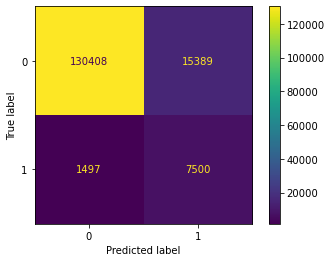

In [87]:
cm_xgb = confusion_matrix(y_test, y_predict_test_xgboost, labels=model_xgboost.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=model_xgboost.classes_)

disp_xgb.plot()
plt.show()

Here, we can ascertain that the XGBoost model has a predicting outcome of 130408 True Positive (0 / Accepted Loan), 7500 True Positives (1 / Rejected Loan), and a False Positive and False Negative of 1497 and 15389 respectively.

In [88]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost[:, 1]))
print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_xgboost[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('XGBoost \n', classification_report(y_train, y_predict_train_xgboost))
print('='*10,'Classification Report test','='*10)
print('XGBoost \n', classification_report(y_test, y_predict_test_xgboost))

ROC AUC score train :  0.9991580985328443
ROC AUC score test :  0.9335498427412134
========== Classification Report train ==========
XGBoost 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     50000
           1       0.99      0.98      0.99     35988

    accuracy                           0.99     85988
   macro avg       0.99      0.99      0.99     85988
weighted avg       0.99      0.99      0.99     85988

========== Classification Report test ==========
XGBoost 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94    145797
           1       0.33      0.83      0.47      8997

    accuracy                           0.89    154794
   macro avg       0.66      0.86      0.70    154794
weighted avg       0.95      0.89      0.91    154794



XGBoost Model Test Set Overview:

- Class 0 Recall is 0.89 / 89%
- Class 1 Recall is 0.83 / 83%

Summary:

Class 0's recall score indicates to us that the model is 89% accurate at classifying loanees as legitimate. This means that there is decent risk of upsetting customer satisfaction by accidentally rejecting their loans.

For Class 1, we have a great recall at 83%, which would indicate that our model is good at accurately classifying loanees as risky. However, there is still a 17% chance of accidentally accepting loans for risky loanees.

ROC-AUC score of 99% for Train Set and 93% for Test Set. Assuming that range of 5% determines if model is fit, then we can conclude that this model is overfit.

## VII. Model Saving

Following the evaluation reports of all our models, we could conclude that the XGBoost model is best in terms of recall. However, it is outshone by the LightGBM model in other areas, especially in the precision and fit of the model. Even if the LightGBM has 3% less Class 1 Recall, its Class 0 Recall is 9% higher, with a precision-recall/f1-score that is more balanced, and a model that is just-fit. Therefore, we will be using the LightGBM model for deployment and inference.

In [89]:
# Redefining final Pipeline, combining our preprocessing Pipeline and our best model into it.
pipe = Pipeline(steps=[("preprocess", preprocess),
                        ("model", LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, n_estimators=300, num_leaves= 50, random_state=42))])

In [109]:
# Training / Fitting our Pipeline to the final Train dataframe for use during deployment. 
pipe.fit(X_train_pipe_final, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('nominal_encode',
                                                                   OneHotEncoder())]),
                                                  array(['home_ownership', 'purpose', 'initial_list_status'], dtype=object)),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'total_acc', '...
       'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'out_prncp_inv'], dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  array(['emp_length', 'verification_status', 'grade', 'sub_grade'],
      dtype=object))])),
                ('model',
                 LGBMClassifier(n_estimators=300, num_leaves=50,
                                random_state=42))])

In [ ]:
# Saving our Preprocessing and Model Pipeline for use in deployment.
pickle.dump(pipe, open('finpro_preproc_model.pkl', 'wb'))

## VIII. Model Inference

In [115]:
inf = {'tot_coll_amt':[4980,11685,6922,12969,15063], 
        'tot_cur_bal':[10000,57134,86813,8900,43197],
        'total_rev_hi_lim':[139434,237148,407142,67911,50065],
        'emp_length':["5 years","1 year","10+ years","6 years","< 1 year"], 
        'revol_util':[80,56,12,86,146], 
        'delinq_2yrs':[20,16,18,8,9],
        'inq_last_6mths':[19,7,5,12,11], 
        'open_acc':[3,5,7,12,32],
        'pub_rec':[23,12,6,30,33], 
        'total_acc':[122,55,75,97,78],
        'acc_now_delinq':[3,0,5,13,10], 
        'collection_recovery_fee':[32,31,16,123,78], 
        'application_type':["JOINT","JOINT","INDIVIDUAL","INDIVIDUAL","JOINT"],
        'last_pymnt_amnt':[7624,8313,8613,1612,697], 
        'recoveries':[100,62,76,66,40], 
        'pymnt_plan':["n","n","y","n","y"], 
        'loan_amnt':[6232,5713,43211,20173,32000],
        'funded_amnt':[6000,7500,10500,65000,43000], 
        'funded_amnt_inv':[34244,41212,10673,23211,14500], 
        'term':[36, 60, 60, 60, 36],
        'int_rate':[11,21,14,9,33], 
        'installment':[33,868,642,331,86], 
        'grade':["C","A","D","G","B"],
        'sub_grade':["C2","A1","D4","G3","B5"],
        'home_ownership':['OWN','RENT','MORTGAGE','RENT','OWN'], 
        'verification_status':['Source Verified','Not Verified','Verified','Verified','Not Verified'],
        'total_rec_late_fee':[86,54,67,41,57], 
        'purpose':["car","credit_card","house","renewable_energy","vacation"], 
        'revol_bal':[3251,8621,1331,2323,4321],
        'initial_list_status':["f","f","w","f","f"], 
        'out_prncp':[12412,2384,4523,12324,7862], 
        'total_pymnt':[1008,6733,2313,2651,5272],
        'total_pymnt_inv':[4863,3003,2351,5723,6231],
        'total_rec_prncp':[4242,7183,6183,1523,2100], 
        'total_rec_int':[325,513,321,123,595],
        'out_prncp_inv':[1414,7168,6537,5371,546], 
        'loan_status':[0,1,1,0,0]
}

In [116]:
df_inf = pd.DataFrame.from_dict(inf)
df_inf

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length,revol_util,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,purpose,revol_bal,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,out_prncp_inv,loan_status
0,4980,10000,139434,5 years,80,20,19,3,23,122,...,car,3251,f,12412,1008,4863,4242,325,1414,0
1,11685,57134,237148,1 year,56,16,7,5,12,55,...,credit_card,8621,f,2384,6733,3003,7183,513,7168,1
2,6922,86813,407142,10+ years,12,18,5,7,6,75,...,house,1331,w,4523,2313,2351,6183,321,6537,1
3,12969,8900,67911,6 years,86,8,12,12,30,97,...,renewable_energy,2323,f,12324,2651,5723,1523,123,5371,0
4,15063,43197,50065,< 1 year,146,9,11,32,33,78,...,vacation,4321,f,7862,5272,6231,2100,595,546,0


In [118]:
pred_inf = pipe.predict(df_inf)
pred_inf = pd.DataFrame(pred_inf, columns = ['loan_status_pred'])
pd.concat([df_inf, pred_inf], axis=1)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length,revol_util,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,revol_bal,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,out_prncp_inv,loan_status,loan_status_pred
0,4980,10000,139434,5 years,80,20,19,3,23,122,...,3251,f,12412,1008,4863,4242,325,1414,0,1
1,11685,57134,237148,1 year,56,16,7,5,12,55,...,8621,f,2384,6733,3003,7183,513,7168,1,1
2,6922,86813,407142,10+ years,12,18,5,7,6,75,...,1331,w,4523,2313,2351,6183,321,6537,1,1
3,12969,8900,67911,6 years,86,8,12,12,30,97,...,2323,f,12324,2651,5723,1523,123,5371,0,1
4,15063,43197,50065,< 1 year,146,9,11,32,33,78,...,4321,f,7862,5272,6231,2100,595,546,0,1


## IX. Conclusion

To recall, the objective of this notebook is to create a Machine Learning model that can determine whether a prospective loanee is eligible or not to be given a loan, based on their financial background and historical transactions. As a summary, we are looking to avoid two problems, and using Recall to evaluate the degree in which our model could minimize those problems. With that, we arrive at these interpretations:

- Recall Class 0 = The closer it is to 100%, the more accurate our model is in detecting legitimate loanees; or there is less tendency for our model to accidentally REJECT a loan when in fact we should be ACCEPTING it.

- Recall Class 1 = The closer it is to 100%, the more accurate our model is in detecting risky loanees; or there is less tendency for our model to accidentally ACCEPT a loan when in fact we should be REJECTING it.

To conclude, all our models have high recalls for Class 0, with most above 97%, and one at 89%. For Class 1 recalls, all our model sits fairly at between 76 - 83%. 

Random Forest Model:

- Class 0 Recall is 0.99 / 99%
- Class 1 Recall is 0.76 / 76%
- Model is just-fit

Decision Tree Model:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.76 / 76%
- Model is just-fit

AdaBoost Model:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.78 / 78%
- Model is just-fit

LightGBM Model:

- Class 0 Recall is 0.98 / 98%
- Class 1 Recall is 0.80 / 80%
- Model is just-fit

XGBoost Model:

- Class 0 Recall is 0.89 / 89%
- Class 1 Recall is 0.83 / 83%
- Model is overfit

The LightGBM model is overall the best.

## X. Further Improvement

Further improvements could be done to the overall performance of our models, especially in increasing the recall of Class 1. The range of such improvements stretch far and should not be focused on the modelling alone. As such, this is the outline of some of the things that could be done to better the model:

- Further data exploration
We could persue to do even more exploration regarding the information from the dataset to help with the feature selection. In the dataset there are lots of column that has almost identical values with just a slight difference. We can observe this anomaly from the columns name. This dataset contain information of three parties which are the prospective debtor, the credit issuer, and somehow investor which we assume invested their money on the credit issuer. We also notice that the features are rarely contain payment history information but rather about the principal and the amount of credit balance also the loan amount.

- More oriented feature selection
Continuation from further data exploration, we could consider to do PCA to find out how many features hold the most information. Also trying the features that only related to payment.

- Additional system tuning
We could do additional hyperparameter tuning in order to find maximum model performance. With this three improvement combined we would be able to see other posibilities regarding our model performance.